<a href="https://colab.research.google.com/github/Fridman77/LFPC-Labs/blob/main/Lab1LFPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Laboratatorul Nr.1 FAF203 Petru Stratulat  Varianta 17**

*   For the formal grammar G=(VN, VT, P, S) need be obtained five strings, that belong to the language L(G), that is generated by this grammar. The length of strings must be no lesser than the number of characters from the alphabet VN+2. 

*   Convert regular grammar to Finite Automaton (FA).

*   Determine the grammar type by the Chromsky classification



 VN={S, A, B, C}, 
VT={a, b, c, d},

P={ S -> dA

 A -> aB

 B -> bC

 C -> cB

 A -> bA

 B -> aB

 B -> d }


**Dupa clasificarea lui Chromsky e de tipul 3 Regular grammars.**

*Type-3 grammars generate the regular languages. Such a grammar restricts its rules to a single nonterminal on the left-hand side and a right-hand side consisting of a single terminal,possibly followed (or preceded,but not both in the same grammar) by a single nonterminal.*

In urmatoare linie de cod citim info despre gramatica ,si apoi impartim setul in alphabetul terminal si nonterminal, unde VN sunt variabilele(nontemrinale)iar VT sunt simbolurile terminale.

In [97]:
input = ['S A B C','a b c d','S dA','A aB','B bC','C cB','A bA','B aB','B d']
nonterminale = list(input[0].split())
terminale = list(input[1].split())

'S A B C' [0], 'a b c d' [1], 'S dA'[2], 'A aB'[3], 'B bC'[4], 'C cB'[5], 'A bA'[6], 'B aB'[7], 'B d'[8]

Acum sortam setul si primtam lista optinuta, incepem sortarea de la pozitia [2] spre sfarsitul setului, si le facem split in keyid so valueid.

Exemplu [[S]keyid [dA]valueid] [[d][A]]valueid[1]valueid[0]

if-ul va le va imparti si la valueid le va face swap intre ele.

la fel if-ul il folosim pentru a grupa valorile dupa keyid


In [98]:
list1 = {}

for line in input[2 : ]:
    key_id, value_id = line.split()

    if len(value_id) == 2:
        value_id = (value_id[1], value_id[0])
    else:
        value_id = ('END', value_id[0])
        
    if key_id in list1:
        list1[key_id].append(value_id)
    else:
        list1[key_id] = [ value_id ]

list1

{'A': [('B', 'a'), ('A', 'b')],
 'B': [('C', 'b'), ('B', 'a'), ('END', 'd')],
 'C': [('B', 'c')],
 'S': [('A', 'd')]}

In [99]:
list2 = {}

for line in input[2 : ]:
    key_id, value_id = line.split()

    if len(value_id) == 2:
        value_id = (value_id[1], value_id[0])
    else:
        value_id = ('END', value_id[0])

    qid = 'q' + str(nonterminale.index(key_id))

    if value_id[0] != 'END':
       value_id =('q' + str(nonterminale.index(value_id[0])), value_id[1])
        
    if qid in list2:
        list2[qid].append(value_id)
    else:
        list2[qid] = [ value_id ]

list2

{'q0': [('q1', 'd')],
 'q1': [('q2', 'a'), ('q1', 'b')],
 'q2': [('q3', 'b'), ('q2', 'a'), ('END', 'd')],
 'q3': [('q2', 'c')]}

Flosind libraria graphviz folosita pentru FA representation, reprezentam FA graph pententru lista.
https://graphviz.org/

In [100]:
import graphviz
def fa (list1):
  g = graphviz.Digraph()

  for node in list1:
      for value_id in list1[node]:
          adj_node, weight = value_id
          g.edge(node, adj_node, label = weight)

  g.node('')
  g.edge('', 'S')
  g.node('END')
  return g

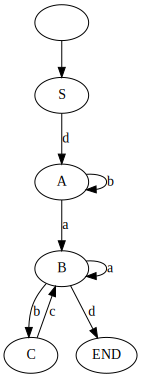

In [101]:
fa(list1)

In [102]:
import graphviz
def fa (list1):
  g = graphviz.Digraph()

  for node in list1:
      for value_id in list1[node]:
          adj_node, weight = value_id
          g.edge(node, adj_node, label = weight)

  g.node('')
  g.edge('', 'q0')
  g.node('END')
  return g

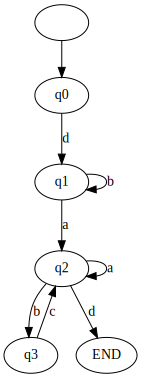

In [103]:
fa(list2)

Acum creem functia care face check la string daca coincide cu gramatinca.
Stringul il punem in cod.
Ca raspuns primim END 

In [106]:
def checkfa(string, listcheck):
  character = list(listcheck.keys())[0]
  for ch in string:
    if character == 'END':
      return False

    for adj_node, weight in listcheck[character]:
      if ch == weight:
         character = adj_node
         break
    
    else:
      return False
    
    return character == 'END'

print( checkfa('dabaa', list2))


False
